In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

alt.data_transformers.enable("default", max_rows=10000)

DataTransformerRegistry.enable('default')

In [75]:
df = pd.read_csv("archive/vgsales.csv")

# Remover a coluna Rank
df = df.drop(columns=["Rank"])

# Filtrar os dados removendo valores com Year = NaN e com Year acima de 2016
df = df.dropna(subset=["Year"])
df = df[df["Year"] <= 2016]

In [76]:
# Calcular a frequencia de anos
year_counts = df["Year"].value_counts()

top_10_years_most_freq = year_counts.nlargest(10).reset_index()
top_10_years_most_freq.columns = ["Year", "Count"]

top_10_years_least_freq = year_counts.nsmallest(10).reset_index()
top_10_years_least_freq.columns = ["Year", "Count"]

In [77]:
# Gráfico de barras com os 10 anos com mais jogos lançados
top10 = (
    alt.Chart(top_10_years_most_freq)
    .mark_bar()
    .encode(
        x=alt.X("Year:O", axis=alt.Axis(title="Ano", labelAngle=45)),
        y="Count:Q",
        color=alt.Color("Year:O", scale=alt.Scale(scheme="rainbow")),
        tooltip=["Year", "Count"],
    )
    .properties(title="Top 10 anos com mais jogos lançados", width=600, height=400)
)
top10.show()

alt.Chart(...)

In [78]:
# Gráfico de barras com os 10 anos com menos jogos lançados
top10 = (
    alt.Chart(top_10_years_least_freq)
    .mark_bar()
    .encode(
        x=alt.X("Year:O", axis=alt.Axis(title="Ano", labelAngle=45)),
        y="Count:Q",
        color=alt.Color("Year:O", scale=alt.Scale(scheme="rainbow")),
        tooltip=["Year", "Count"],
    )
    .properties(title="Top 10 anos com menos jogos lançados", width=600, height=400)
)
top10.show()

alt.Chart(...)

In [79]:
genre_counts = df["Genre"].value_counts().reset_index()
genre_counts.columns = ["Genre", "Count"]

genre = (
    alt.Chart(genre_counts)
    .mark_bar()
    .encode(
        x=alt.X("Genre:N", axis=alt.Axis(labelAngle=45), sort="-y"),
        y="Count:Q",
        color=alt.Color("Genre:O", scale=alt.Scale(scheme="rainbow")),
        tooltip=["Genre", "Count"],
    )
    .properties(title="Gêneros de jogos mais populares", width=600, height=400)
)
genre.show()

alt.Chart(...)

In [80]:
top_5_years = df["Year"].value_counts().nlargest(5).index.tolist()

filtered_df = df[df["Year"].isin(top_5_years)]

# 3. Cria o gráfico com Altair
chart = (
    alt.Chart(filtered_df)
    .mark_bar()
    .encode(
        x=alt.X(
            "Year:N", sort=top_5_years, axis=alt.Axis(labelAngle=90, labelFontSize=16)
        ),
        y=alt.Y("count()", title="Count"),
        xOffset="Genre:N",
        color=alt.Color("Genre:N", title="Genre", scale=alt.Scale(scheme="tableau20")),
        tooltip=["Genre", "count()"],
    )
    .properties(
        width=900,  # ajuste a largura conforme necessário
        height=300,  # ajuste a altura conforme necessário
    )
)

chart

alt.Chart(...)

In [81]:
# Qual ano teve o maior numero de vendas globais?
year_sales = df.groupby("Year")["Global_Sales"].sum().reset_index()
year_sales.columns = ["Year", "Global_Sales"]


top_year_sales = (
    alt.Chart(year_sales)
    .mark_bar()
    .encode(
        x=alt.X("Year:O", axis=alt.Axis(title="Ano", labelAngle=45)),
        y="Global_Sales:Q",
        color=alt.Color("Year:O", scale=alt.Scale(scheme="rainbow")),
        tooltip=["Year", "Global_Sales"],
    )
    .properties(title="Year with highest sales worldwide", width=600, height=400)
)
top_year_sales.show()

alt.Chart(...)

In [82]:
# Criar o DataFrame agrupado e filtrado
year_sale_dx = df.groupby(by=["Year", "Genre"])["Global_Sales"].sum().reset_index()
year_sale = (
    year_sale_dx.groupby(by=["Year"])["Global_Sales"].transform("max")
    == year_sale_dx["Global_Sales"]
)
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

# Criar o gráfico de barras
bars = (
    alt.Chart(year_sale_max)
    .mark_bar()
    .encode(
        x=alt.X(
            "Year:O", axis=alt.Axis(title="Ano", labelAngle=-90)
        ),  # Rotação de 90 graus no eixo X
        y=alt.Y("Global_Sales:Q", axis=alt.Axis(title="Vendas Globais")),
        color=alt.Color("Year:O", scale=alt.Scale(scheme="rainbow")),
        tooltip=["Year", "Global_Sales", "Genre"],
    )
    .properties(
        title="Genero com maior número de vendas globais", width=900, height=600
    )
)

# Adicionar os rótulos no topo das barras
text = (
    alt.Chart(year_sale_max)
    .mark_text(
        align="center",
        baseline="middle",
        fontSize=14,
        dx=30,
        color="black",
        angle=270,  # Rotação de 90 graus
        fontWeight="bold",
    )
    .encode(x="Year:O", y="Global_Sales:Q", text=alt.Text("Genre:N"))
)

# Combinar barras e rótulos
chart = bars + text
chart.show()

alt.LayerChart(...)

In [83]:
# Qual platforma teve mais vendas?
data_platform = (
    df.groupby("Platform")["Global_Sales"]
    .sum()
    .reset_index()
    .sort_values(by="Global_Sales", ascending=False)
)
data_platform.columns = ["Platform", "Global_Sales"]

top_platform_sales = (
    alt.Chart(data_platform)
    .mark_bar()
    .encode(
        x=alt.X(
            "Platform:N", axis=alt.Axis(title="Plataformas", labelAngle=45), sort="-y"
        ),
        y="Global_Sales:Q",
        color=alt.Color("Platform:N", scale=alt.Scale(scheme="tableau20")),
        tooltip=["Platform", "Global_Sales"],
    )
    .properties(title="Platform with highest sales worldwide", width=900, height=400)
)
top_platform_sales.show()

alt.Chart(...)

In [84]:
# Jogo mais vendido por plataforma
data_platform_game_dx = (
    df.groupby(by=["Platform", "Name"])["Global_Sales"].sum().reset_index()
)
data_platform_game = (
    data_platform_game_dx.groupby(by=["Platform"])["Global_Sales"].transform("max")
    == data_platform_game_dx["Global_Sales"]
)
data_platform_game_max = data_platform_game_dx[data_platform_game].reset_index(
    drop=True
)


# Criar o gráfico de barras
game_sales_per_platform = (
    alt.Chart(data_platform_game_max)
    .mark_bar()
    .encode(
        x=alt.X(
            "Platform:N", axis=alt.Axis(title="Plataforma", labelAngle=-90)
        ),  # Rotação de 90 graus no eixo X
        y=alt.Y("Global_Sales:Q", axis=alt.Axis(title="Vendas Globais")),
        color=alt.Color("Platform:N", scale=alt.Scale(scheme="rainbow")),
        tooltip=["Platform", "Global_Sales", "Name"],
    )
    .properties(title="Jogo mais vendido por plataforma", width=900, height=600)
)
game_sales_per_platform.show()

alt.Chart(...)

In [85]:
# Agrupar os dados por gênero e somar as vendas globais
genre_sales = df.groupby("Genre")["Global_Sales"].sum().reset_index()
genre_sales.columns = ["Genre", "Global_Sales"]

# Criar o gráfico de barras
genre_sales_chart = (
    alt.Chart(genre_sales)
    .mark_bar()
    .encode(
        x=alt.X("Genre:N", axis=alt.Axis(title="Gênero", labelAngle=45), sort="-y"),
        y=alt.Y("Global_Sales:Q", axis=alt.Axis(title="Vendas Globais")),
        color=alt.Color("Genre:N", scale=alt.Scale(scheme="rainbow")),
        tooltip=["Genre", "Global_Sales"],
    )
    .properties(title="Comparação de Vendas por Gênero", width=600, height=400)
)


genre_sales_chart.show()

alt.Chart(...)

In [86]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head(40)


comp_chart = alt.Chart(comp_table).mark_bar().encode(
    x='Genre:N',
    y='Sale_Price:Q',
    color='Sale_Area:N',
    column='Sale_Area:N',
    tooltip=['Genre', 'Sale_Price']
).properties(
    title='Comparação de Vendas por Gênero em cada localidade',
    width=300,
    height=300
)

comp_chart.show()

alt.Chart(...)

In [87]:
comp_platform = (df.groupby("Platform")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().reset_index())

comp_platform = pd.melt(comp_platform, id_vars=["Platform"], value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"], var_name="Sale_Area", value_name="Sale_Price")

comp_platform_chart = alt.Chart(comp_platform).mark_bar().encode(
    x="Platform:N",
    y="Sale_Price:Q",
    color="Sale_Area:N",
    column="Sale_Area:N",
    tooltip=["Platform", "Sale_Price"]
).properties(
    title="Comparação de Vendas por Plataforma em cada localidade",
    width=600,
    height=300
)

comp_platform_chart.show()

alt.Chart(...)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive')])

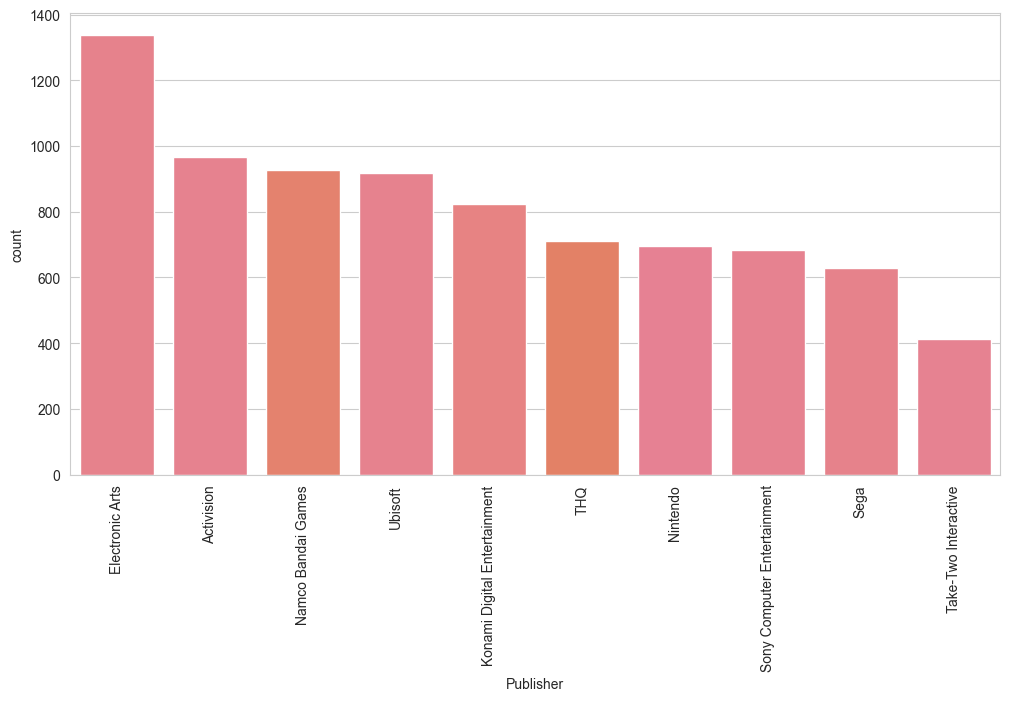

In [116]:
# A partir de agora, vou usar o matplotlib para criar os gráficos

top_publisher = df.groupby("Publisher")["Year"].count().nlargest(10).reset_index()
top_publisher.columns = ["Publisher", "Count"]

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Publisher", order=top_publisher["Publisher"], hue="Publisher", legend=False)
plt.xticks(rotation=90)

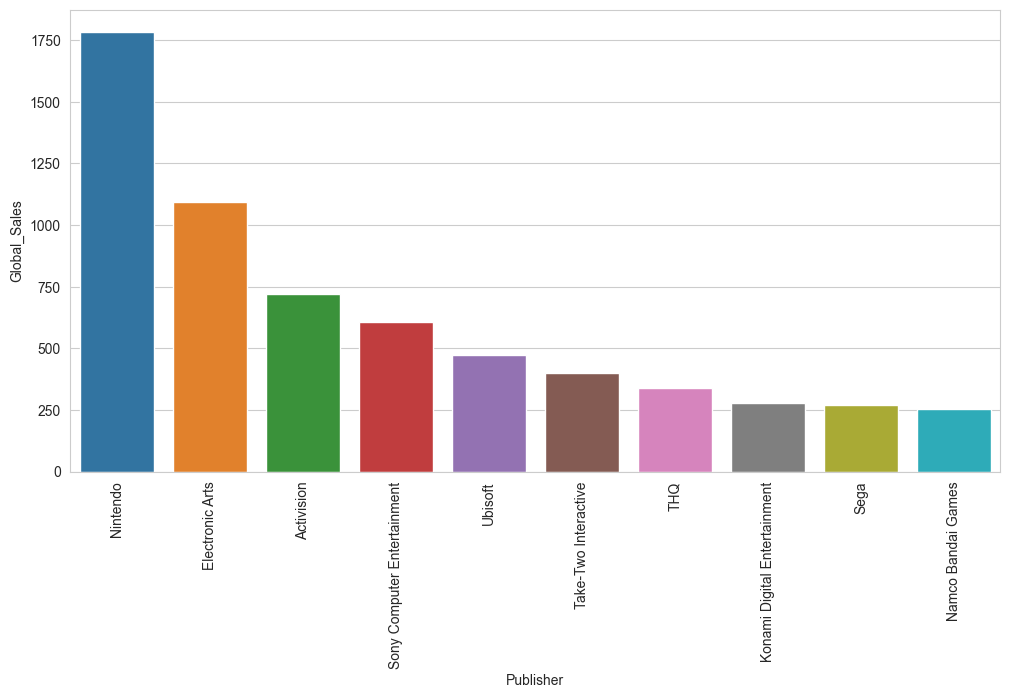

In [109]:
# Vendas globais por publicadora
publisher_sales = df.groupby("Publisher")["Global_Sales"].sum().nlargest(10).reset_index()
publisher_sales.columns = ["Publisher", "Global_Sales"]

plt.figure(figsize=(12, 6))
sns.barplot(data=publisher_sales, x="Publisher", y="Global_Sales", hue="Publisher")
plt.xticks(rotation=90)

plt.show()

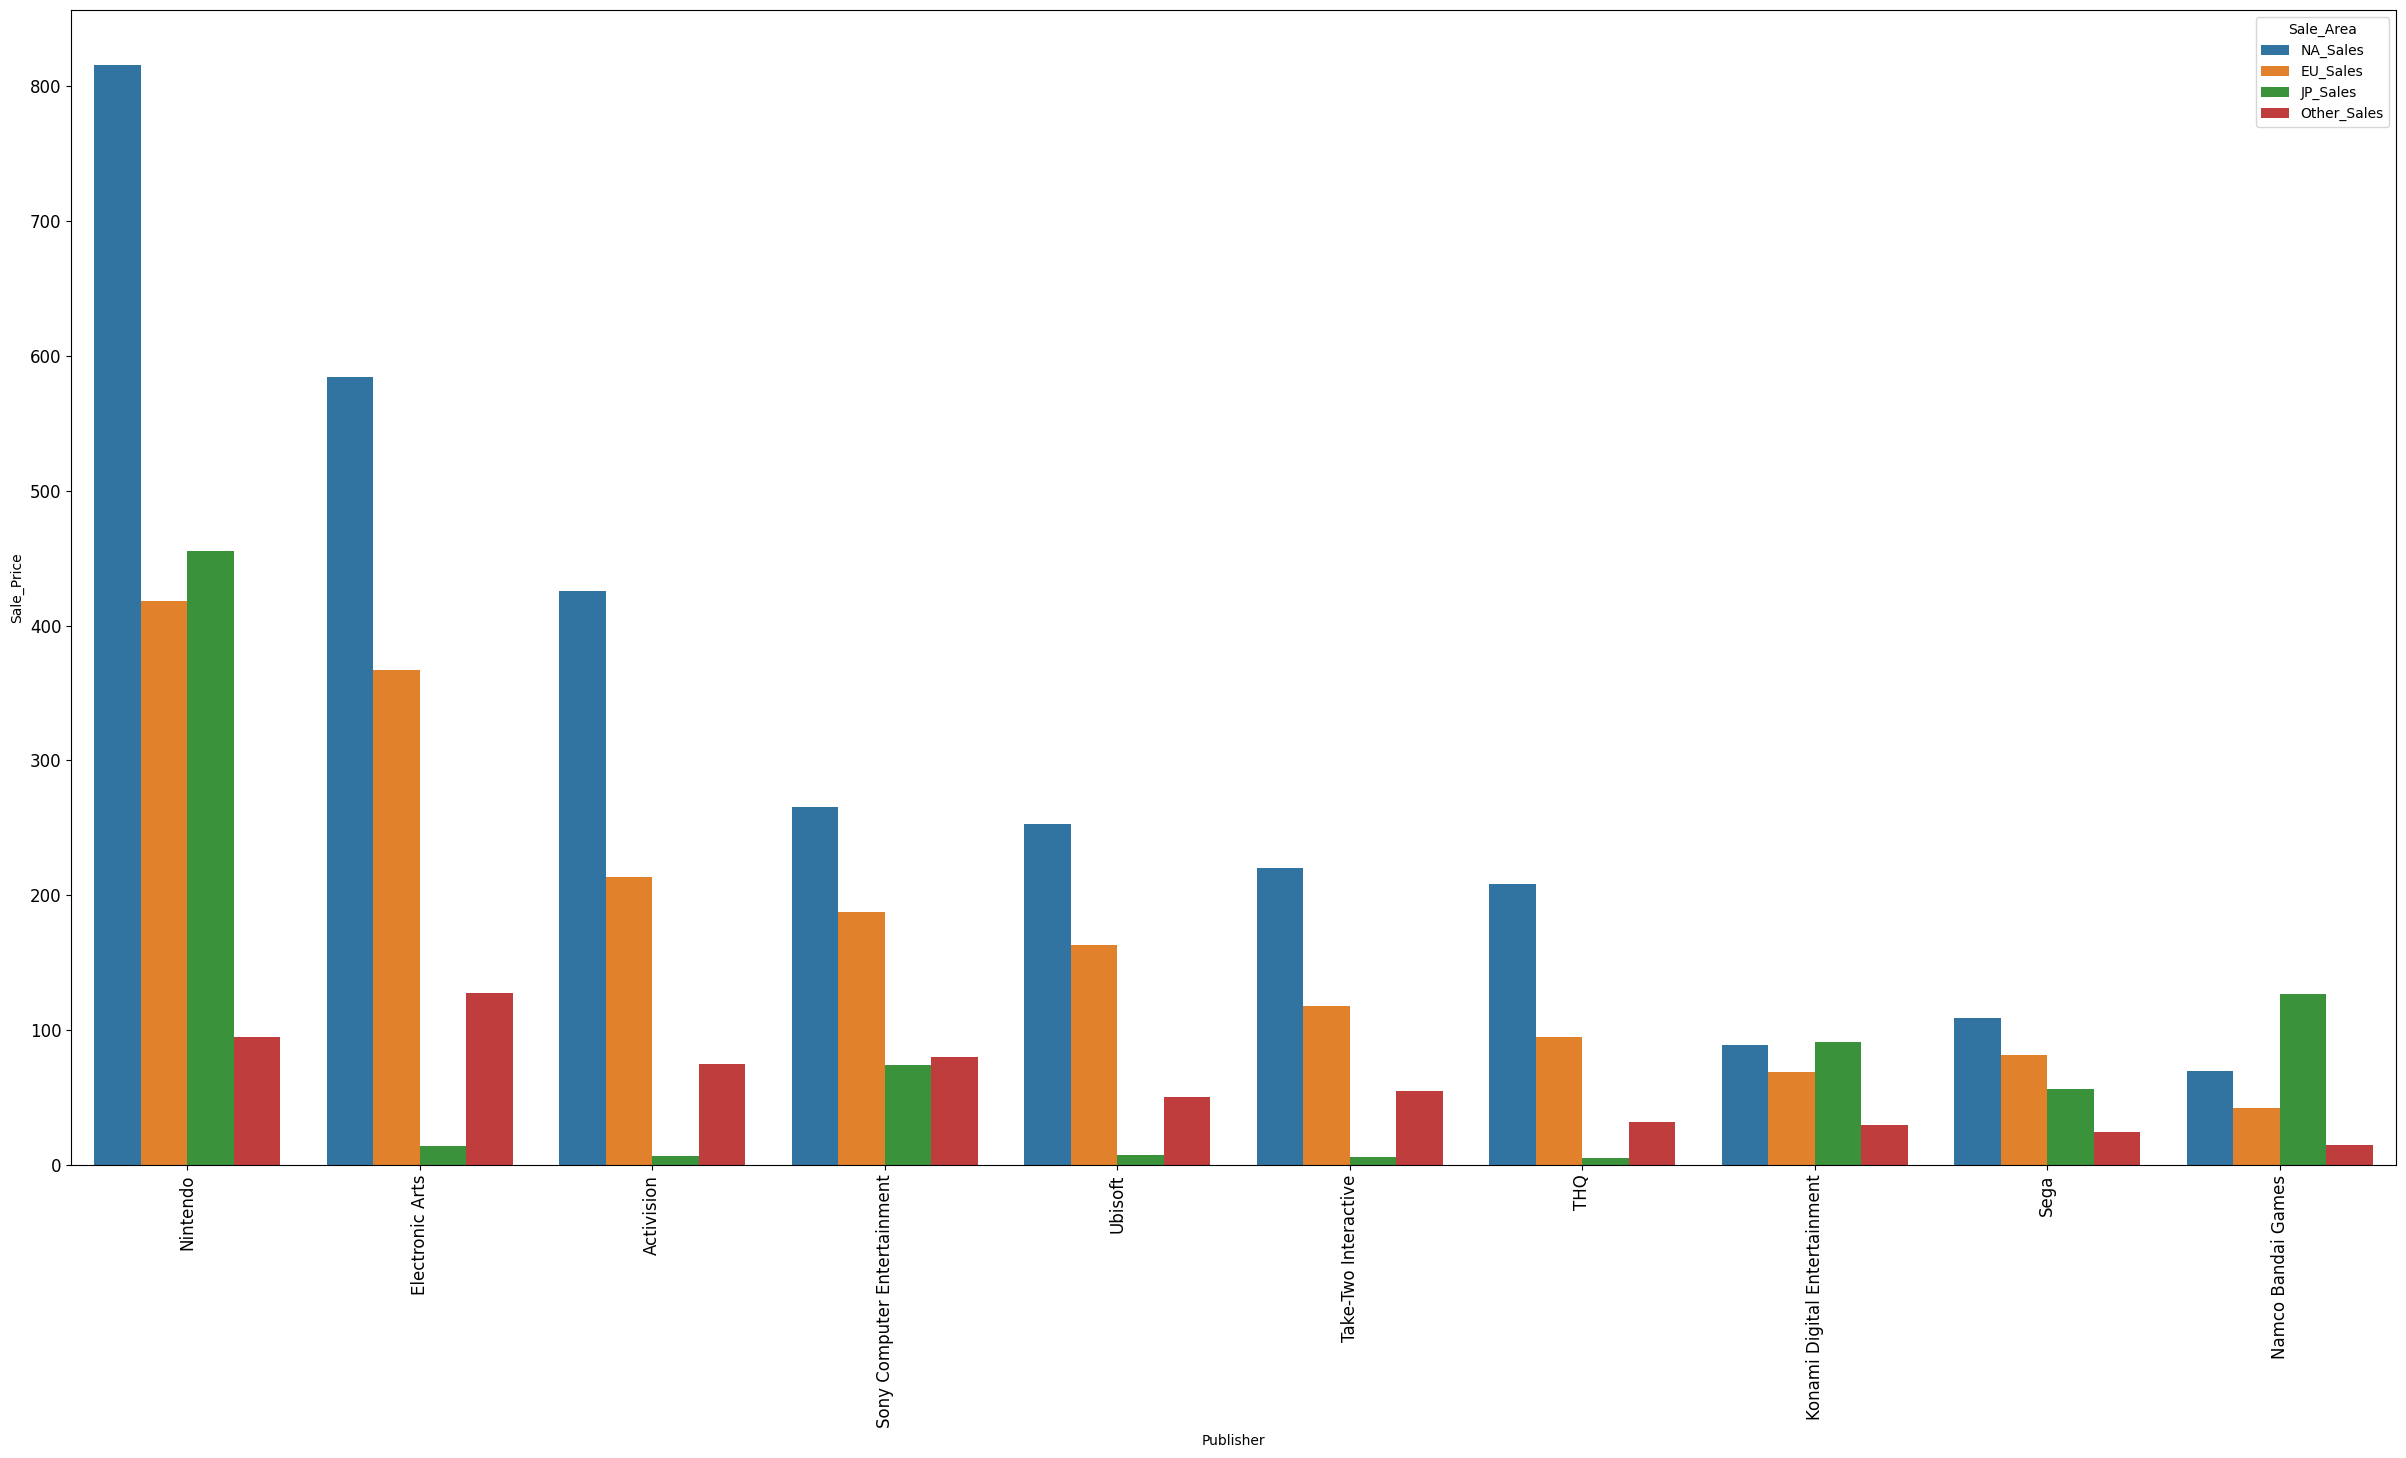

In [91]:
# Comparação de publicadoras


comp_publisher = df[["Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]

comp_publisher = comp_publisher.groupby(by=["Publisher"]).sum().reset_index().sort_values(by="Global_Sales", ascending=False)

comp_publisher = comp_publisher.head(10)

comp_publisher = pd.melt(comp_publisher, id_vars=["Publisher"], value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"], var_name="Sale_Area", value_name="Sale_Price")


plt.figure(figsize=(30, 15))
sns.barplot(data=comp_publisher, x="Publisher", y="Sale_Price", hue="Sale_Area")
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

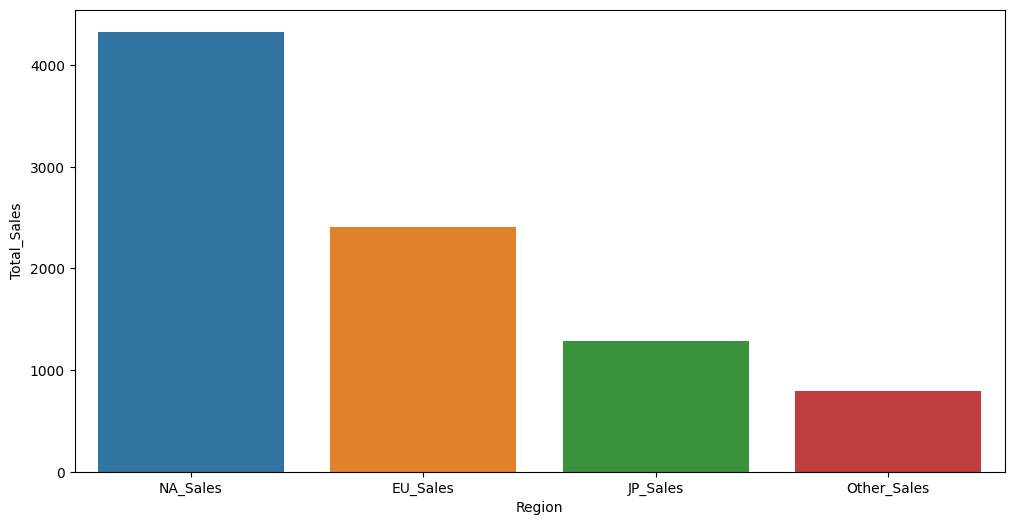

In [99]:
# Total de vendas por região
top_sales_region = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().round().reset_index()

top_sales_region = top_sales_region.rename(columns={"index": "Region", 0: "Total_Sales"})

plt.figure(figsize=(12, 6))
sns.barplot(data=top_sales_region, x="Region", y="Total_Sales", hue="Region")
plt.show()

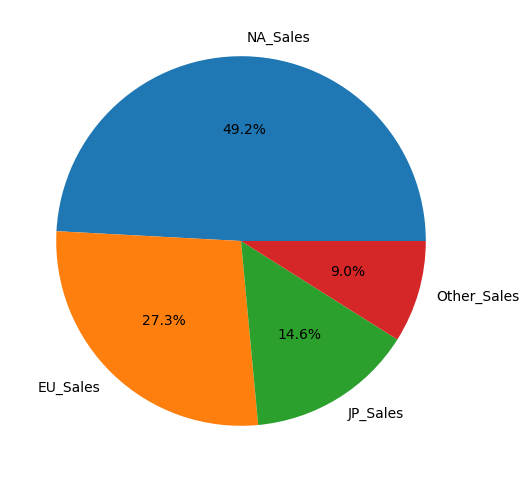

In [102]:
# Grafico de pizza
plt.figure(figsize=(12, 6))
plt.pie(top_sales_region["Total_Sales"], labels=top_sales_region["Region"], autopct="%1.1f%%")
plt.show()

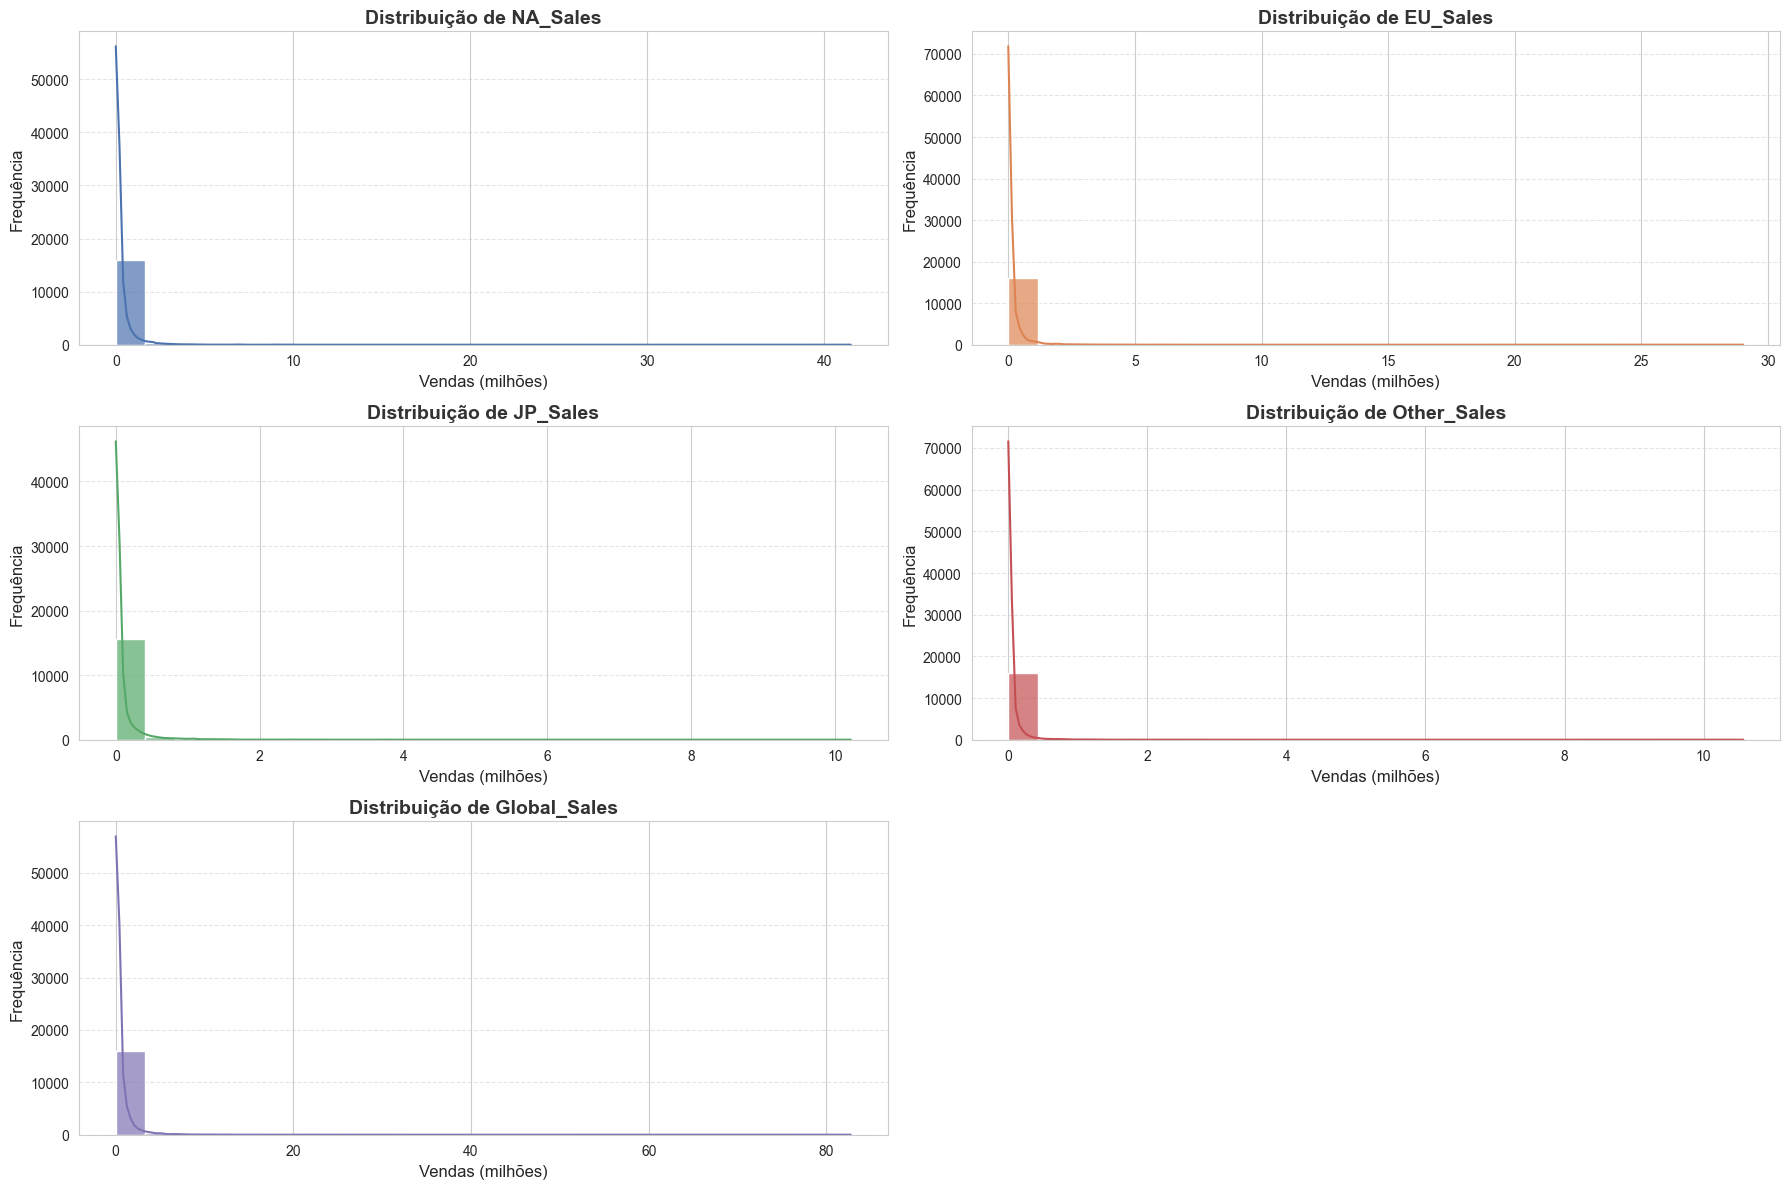

In [ ]:
# Configuração geral do estilo
sns.set_style("whitegrid")  # Deixa o fundo mais limpo e profissional
plt.figure(figsize=(18, 12))  # Ajuste no tamanho da figura

# Lista de colunas a serem plotadas
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
colors = sns.color_palette("deep", len(sales_columns))  # Gera cores mais agradáveis

# Criando os subplots
for i, (col, color) in enumerate(zip(sales_columns, colors)):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True, bins=25, color=color, alpha=0.7)  # Transparência ajustada
    plt.title(f"Distribuição de {col}", fontsize=14, fontweight="bold", color="#333")  # Melhor contraste no título
    plt.xlabel("Vendas (milhões)", fontsize=12)
    plt.ylabel("Frequência", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.5)  # Adiciona grade discreta

# Ajuste no layout para evitar sobreposição
plt.tight_layout()
plt.show()


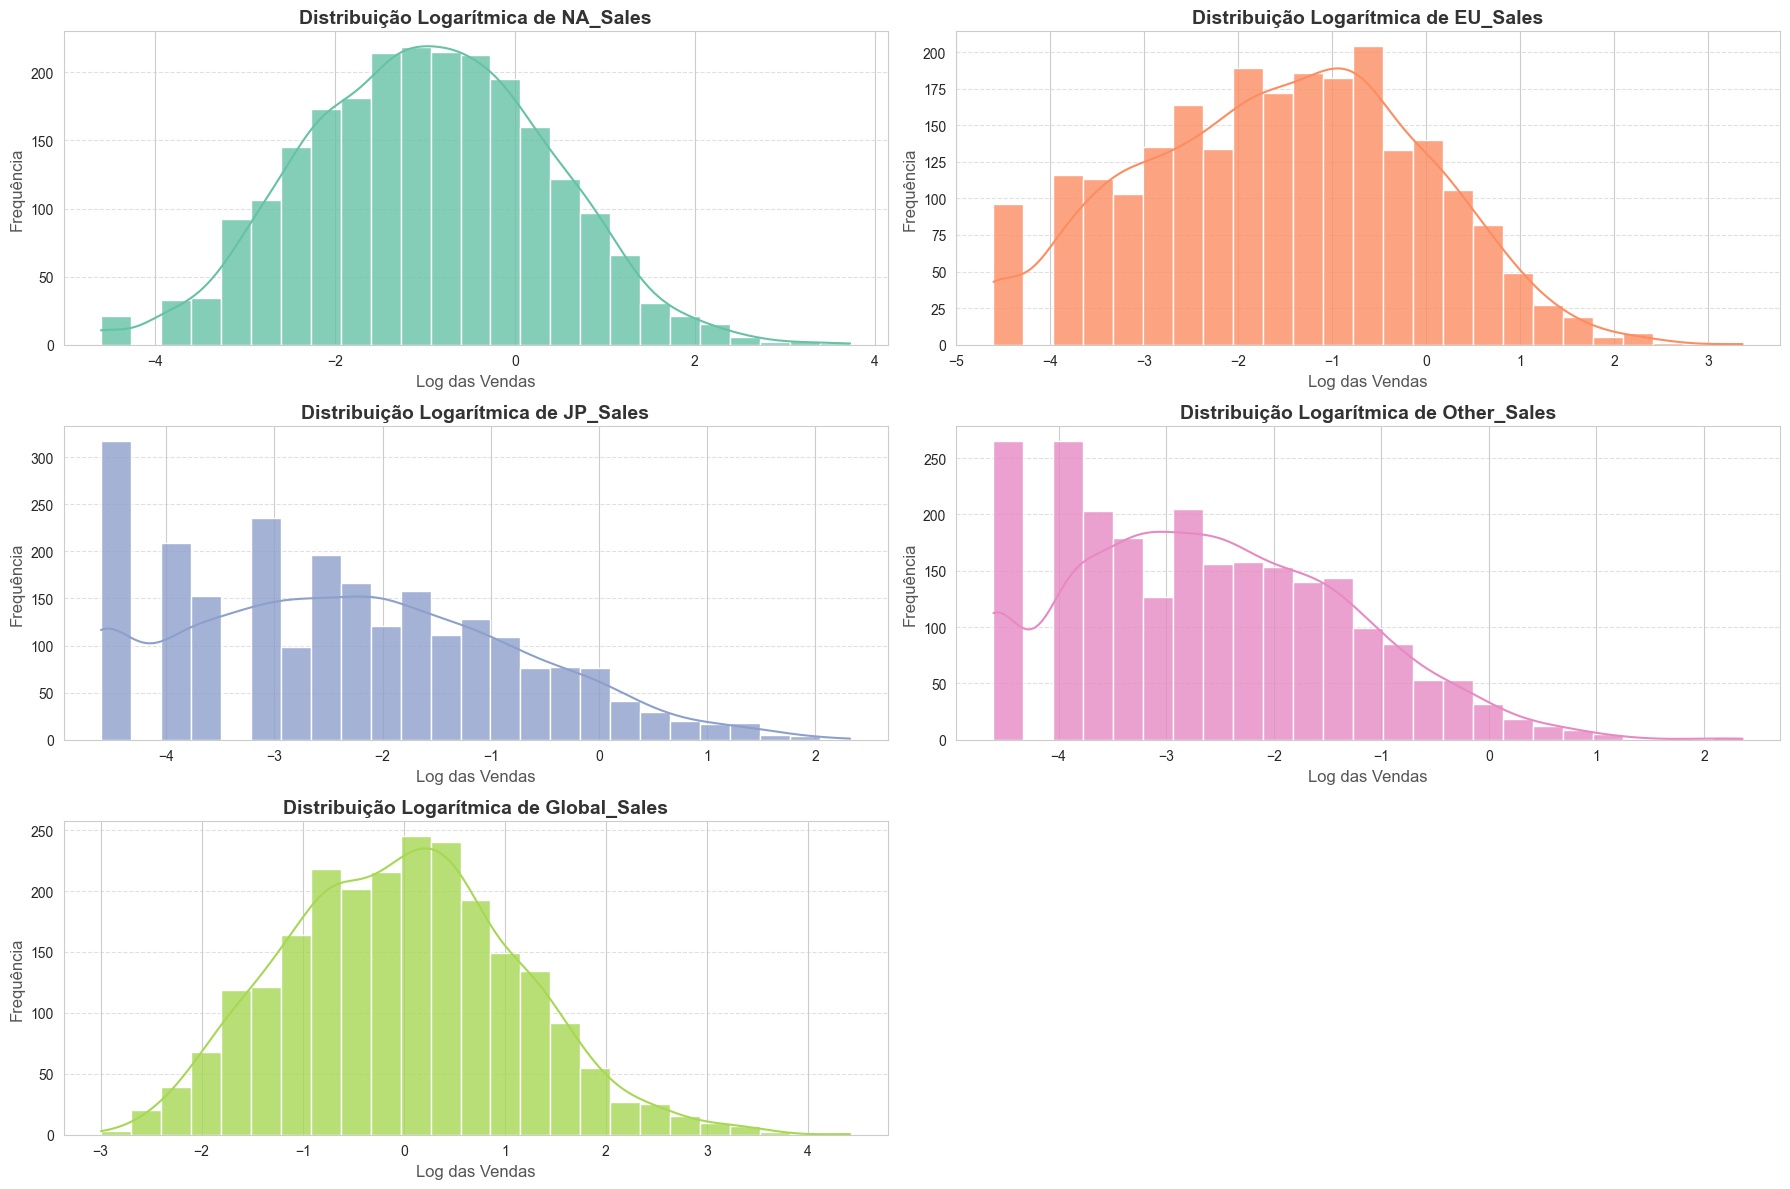

In [120]:
# Copiar DataFrame e remover valores zero
df_hist_log = df.copy()
df_hist_log = df_hist_log[(df_hist_log.NA_Sales > 0) & 
                          (df_hist_log.EU_Sales > 0) & 
                          (df_hist_log.JP_Sales > 0) & 
                          (df_hist_log.Other_Sales > 0) & 
                          (df_hist_log.Global_Sales > 0)]

# Configuração do tamanho do gráfico
plt.figure(figsize=(18, 12))

# Definição das colunas de vendas e cores
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
colors = sns.color_palette("Set2", len(sales_columns))

# Criando subplots
for i, (col, color) in enumerate(zip(sales_columns, colors)):
    plt.subplot(3, 2, i+1)
    sns.histplot(np.log(df_hist_log[col]), kde=True, bins=25, color=color, alpha=0.8)
    
    plt.title(f"Distribuição Logarítmica de {col}", fontsize=14, fontweight='bold', color="#333")
    plt.xlabel("Log das Vendas", fontsize=12, color="#555")
    plt.ylabel("Frequência", fontsize=12, color="#555")
    plt.grid(axis='y', linestyle='--', alpha=0.6)

# Ajusta layout para evitar sobreposição
plt.tight_layout()
plt.show()
